#IMPORT 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#Question 1:Apply linear regression and find the predicted Y for the below data. Apply any metric and display the accuracy of the predicted y.

X: 1 2 3 4 5

---
Y: 2 1 3 6 9



#(i) Using sklearn and metric.

   X  Y
0  1  2
1  2  1
2  3  3
3  4  6
4  5  9
Coefficients:  [[1.9]]
Intercept:  [-1.5]
   X  Y  Predicted Y    Accuracy
0  1  2          0.4  -80.000000
1  2  1          2.3  130.000000
2  3  3          4.2   40.000000
3  4  6          6.1    1.666667
4  5  9          8.0  -11.111111
Average Accuracy:  16.111111111111136

Mean Absolute Error: 1.04
Mean Squared Error: 1.3399999999999999
Root Mean Squared Error: 1.1575836902790224
R2-score: %.2f (RMSE): 0.8434579439252337


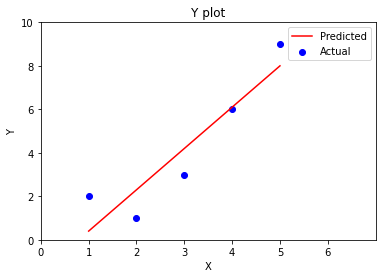

In [ ]:
datafile = pd.DataFrame()
datafile[0]=[1,2,3,4,5]
datafile[1]=[2,1,3,6,9]
datafile.columns =["X","Y"]
print(datafile)

from sklearn import linear_model
regress = linear_model.LinearRegression()
train_x = np.asanyarray(datafile[['X']])
train_y = np.asanyarray(datafile[['Y']])
regress.fit (train_x,train_y)
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)
y_predicted = regress.predict(train_x)
datafile['Predicted Y'] = y_predicted

A=[]
d=0
for i in datafile['X']:
  j=datafile.loc[d,'Y']
  k=datafile.loc[d,'Predicted Y']
  c=((k-j)/j)*100
  A.insert(d,c)
  d+=1
datafile['Accuracy']=A
print(datafile)
print("Average Accuracy: ",datafile['Accuracy'].mean())

#METRICS
from sklearn import metrics
print('\nMean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))
from sklearn.metrics import r2_score
print("R2-score: %.2f (RMSE):" , r2_score(train_y,y_predicted) )


plt.scatter(datafile.X, datafile.Y,  color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Y plot")
plt.xlim(0,7)
plt.ylim(0,10)
plt.xticks(np.arange(0,7,1))
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#(ii) Without Using sklearn

In [ ]:
datafile = pd.DataFrame()
datafile[0]=[1,2,3,4,5]
datafile[1]=[2,1,3,6,9]
datafile.columns =["X","Y"]
print(datafile)
r=datafile['X'].corr(datafile['Y'])
sdx=datafile['X'].std()
sdy=datafile['Y'].std()
b1=round((r*sdy)/sdx,2)
print(r,sdx,sdy)
b0=round((datafile['Y'].mean())-(b1*(datafile['X'].mean())),2)
print ('Coefficients: ', b1)
print ('Intercept: ',b0)
P=[]
d=0
for i in datafile['X']:
  c=(b0+(b1*i))
  P.insert(d,c)
  d+=1
datafile['Predicted Y']=P
A=[]
d=0
for i in datafile['X']:
  j=datafile.loc[d,'Y']
  k=datafile.loc[d,'Predicted Y']
  c=((k-j)/j)*100
  A.insert(d,c)
  d+=1
datafile['Accuracy']=A
print(datafile)
print("Average Accuracy: ",datafile['Accuracy'].mean())
from sklearn.metrics import r2_score
print("R2-score: %.2f (RMSE):" , r2_score(datafile['Y'],datafile['Predicted Y']))


   X  Y
0  1  2
1  2  1
2  3  3
3  4  6
4  5  9
0.9183996645933804 1.5811388300841898 3.271085446759225
Coefficients:  1.9
Intercept:  -1.5
   X  Y  Predicted Y    Accuracy
0  1  2          0.4  -80.000000
1  2  1          2.3  130.000000
2  3  3          4.2   40.000000
3  4  6          6.1    1.666667
4  5  9          8.0  -11.111111
Average Accuracy:  16.111111111111097
R2-score: %.2f (RMSE): 0.8434579439252337


#Question 2:Take any 5 courses, consider its CAT 1 marks as x values and FAT marks and y values.Apply linear regression and predict the FAT marks (y value) for any of the course's (6th course) CAT 1 marks which is not considered for training.Compare the actual Y and the predicted Y for the 6th course.

In [ ]:
course=pd.DataFrame()
course[0]=['Java','Microprossor','CPS','DAA','DSA']
course[1]=[26,41,28,37,35]
course[2]=[70,75,52,80,60]
course.columns =["Course","CAT","FAT"]
course6="STS"
course6cat=38
course6fat=65
print(course)

         Course  CAT  FAT
0          Java   26   70
1  Microprossor   41   75
2           CPS   28   52
3           DAA   37   80
4           DSA   35   60


#With sklearn

In [ ]:
from sklearn import linear_model
regress = linear_model.LinearRegression()
train_x = np.asanyarray(course[['CAT']])
train_y = np.asanyarray(course[['FAT']])
regress.fit (train_x,train_y)
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)
y_predicted = regress.predict(train_x)
course['Predicted FAT'] = y_predicted
A=[]
d=0
for i in course['CAT']:
  j=course.loc[d,'FAT']
  k=course.loc[d,'Predicted FAT']
  c=((k-j)/j)*100
  A.insert(d,c)
  d+=1
course['Accuracy']=A
print(course)
print("Average Accuracy: ",course['Accuracy'].mean())
from sklearn.metrics import r2_score
print("R2-score: %.2f (RMSE):" , r2_score(course['FAT'],course['Predicted FAT']),'\n')

pcourse6fat=(course6cat*regress.coef_)+regress.intercept_
print("For ",course6," Predicted Fat marks is ",pcourse6fat)
print("Difference in actual Fat marks and Predicted Fat marks is: ",(course6fat-pcourse6fat))

Coefficients:  [[0.98727735]]
Intercept:  [34.42493639]
         Course  CAT  FAT  Predicted FAT   Accuracy
0          Java   26   70      60.094148 -14.151218
1  Microprossor   41   75      74.903308  -0.128923
2           CPS   28   52      62.068702  19.362889
3           DAA   37   80      70.954198 -11.307252
4           DSA   35   60      68.979644  14.966073
Average Accuracy:  1.7483138998406311
R2-score: %.2f (RMSE): 0.29740963760213635 

For  STS  Predicted Fat marks is  [[71.94147583]]
Difference in actual Fat marks and Predicted Fat marks is:  [[-6.94147583]]


#Without sklearn

In [ ]:
r=course['CAT'].corr(course['FAT'])
sdx=course['CAT'].std()
sdy=course['FAT'].std()
b1=round((r*sdy)/sdx,2)
b0=round((course['FAT'].mean())-(b1*(course['CAT'].mean())),2)
print ('Coefficients: ', b1)
print ('Intercept: ',b0)
P=[]
d=0
for i in course['CAT']:
  c=(b0+(b1*i))
  P.insert(d,c)
  d+=1
course['Predicted FAT']=P
A=[]
d=0
for i in course['CAT']:
  j=course.loc[d,'FAT']
  k=course.loc[d,'Predicted FAT']
  c=((k-j)/j)*100
  A.insert(d,c)
  d+=1
course['Accuracy']=A
print(course)
print("Average Accuracy: ",course['Accuracy'].mean())
from sklearn.metrics import r2_score
print("R2-score: %.2f (RMSE):" , r2_score(course['FAT'],course['Predicted FAT']))

pcourse6fat=(course6cat*b1)+b0
print("\nFor ",course6," Predicted Fat marks is ",pcourse6fat)
print("Difference in actual Fat marks and Predicted Fat marks is: ",(course6fat-pcourse6fat))


Coefficients:  0.99
Intercept:  34.33
         Course  CAT  FAT  Predicted FAT   Accuracy
0          Java   26   70          60.07 -14.185714
1  Microprossor   41   75          74.92  -0.106667
2           CPS   28   52          62.05  19.326923
3           DAA   37   80          70.96 -11.300000
4           DSA   35   60          68.98  14.966667
Average Accuracy:  1.7402417582417509
R2-score: %.2f (RMSE): 0.29740722049689494

For  STS  Predicted Fat marks is  71.94999999999999
Difference in actual Fat marks and Predicted Fat marks is:  -6.949999999999989
